In [2]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [3]:
data = pd.read_csv("insurance.csv", index_col=False)
data=data.replace(['no', 'female', 'yes', 'male'],[0,0,1,1])
data.region = pd.Categorical(data.region)
data['region']=data.region.cat.codes
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
print(data.keys())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
feature_cols = ['age','sex','bmi','children','smoker','region']
#feature_cols = ['Inches']
x = data[feature_cols] # predictor
y = data.charges # response

In [7]:
# split data into train and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
# the test set will be 20% of the whole data set

In [8]:
# instantiate, fit
linreg=linear_model.LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [9]:
print (linreg.intercept_)
print (linreg.coef_)

-11903.58898970043
[  264.94657599    73.27255815   320.056495     543.45934903
 23639.91910437  -351.64339638]


In [10]:
mse = metrics.mean_squared_error(y_test, linreg.predict(x_test))
np.sqrt(mse)
linreg.score(x_test,y_test)

0.7352660512463246

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

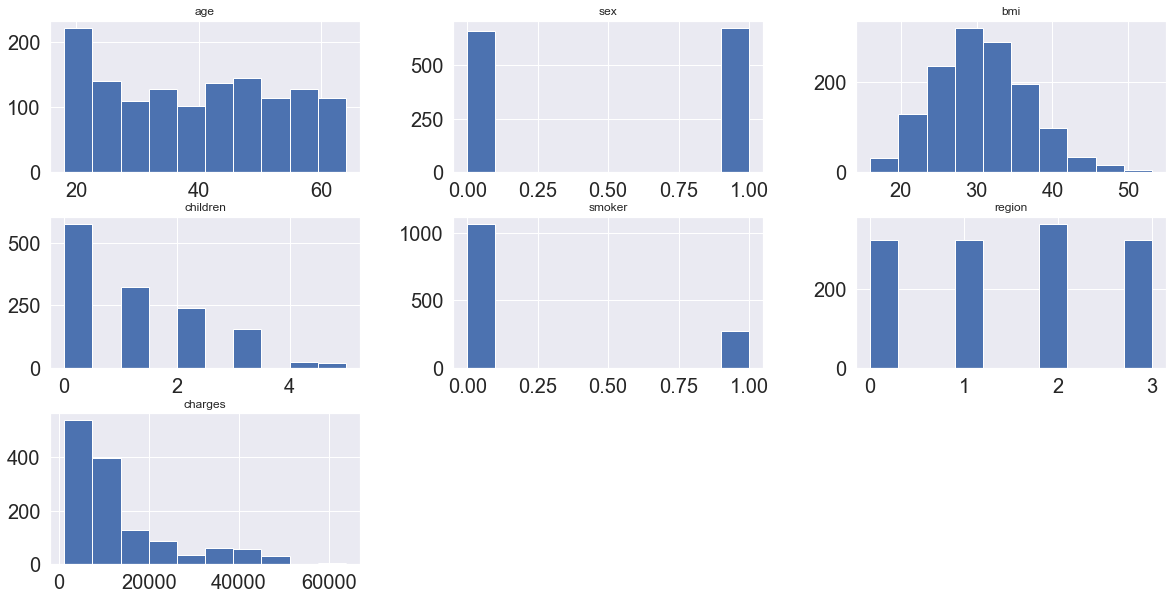

In [12]:
data.hist()
#pyplot.show()